<a href="https://colab.research.google.com/github/ThisulDulneth/uom/blob/main/Stress_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stress Level Prediction - Improved Decision Tree Classifier**

This notebook demonstrates stress level prediction using decision tree classification with hyperparameter tuning and comprehensive analysis.

**1. Import Libraries**

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)

print("="*70)
print("STRESS LEVEL PREDICTION - IMPROVED DECISION TREE CLASSIFIER")
print("="*70)

STRESS LEVEL PREDICTION - IMPROVED DECISION TREE CLASSIFIER


**2. Load and Clean Data**

In [16]:
# Load dataset
df = pd.read_csv('sleep_heath_lifecycle_dataset.csv')
df = df.drop(columns=['Person ID'])
df.columns = [c.strip().lower().replace(' ', '_') for c in df.columns]

print(f"\nDataset shape: {df.shape}")
print(f"Target variable (stress_level) distribution:\n{df['stress_level'].value_counts()}")


Dataset shape: (374, 12)
Target variable (stress_level) distribution:
stress_level
3    71
8    70
4    70
5    67
7    50
6    46
Name: count, dtype: int64


**3. Feature Engineering**

In [17]:
# Split blood pressure into systolic and diastolic
bp = df['blood_pressure'].str.split('/', expand=True)
df['systolic_bp'] = pd.to_numeric(bp[0], errors='coerce')
df['diastolic_bp'] = pd.to_numeric(bp[1], errors='coerce')
df = df.drop(columns='blood_pressure')

# Fill missing sleep disorder values
df['sleep_disorder'] = df['sleep_disorder'].fillna('None')

**4. Encode Categorical Variables**

In [18]:
# One-hot encode categoricals
X = df.drop(columns='stress_level')
y = df['stress_level']
categorical = X.select_dtypes('object').columns
X = pd.get_dummies(X, columns=categorical, drop_first=True)

print(f"\nFeatures after encoding: {X.shape[1]}")
print(f"Feature names: {list(X.columns)}")


Features after encoding: 24
Feature names: ['age', 'sleep_duration', 'quality_of_sleep', 'physical_activity_level', 'heart_rate', 'daily_steps', 'systolic_bp', 'diastolic_bp', 'gender_Male', 'occupation_Doctor', 'occupation_Engineer', 'occupation_Lawyer', 'occupation_Manager', 'occupation_Nurse', 'occupation_Sales Representative', 'occupation_Salesperson', 'occupation_Scientist', 'occupation_Software Engineer', 'occupation_Teacher', 'bmi_category_Normal Weight', 'bmi_category_Obese', 'bmi_category_Overweight', 'sleep_disorder_None', 'sleep_disorder_Sleep Apnea']


**5. Standardize Numeric Features**

In [19]:
# Standardize numeric features
num_cols = X.select_dtypes(['int64', 'float64']).columns
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

**6. Train-Test Split**

In [20]:
# Train / test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y)

print(f"\nTraining set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")


Training set: 299 samples
Test set: 75 samples


**7. Hyperparameter Tuning with Grid Search**

In [21]:
print("\n" + "="*70)
print("HYPERPARAMETER TUNING WITH GRID SEARCH")
print("="*70)

# Define parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10, 15, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2', None]
}

# Create base model
dt_base = DecisionTreeClassifier(random_state=42)

# Perform grid search with cross-validation
print("\nPerforming Grid Search (this may take a moment)...")
grid_search = GridSearchCV(
    estimator=dt_base,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print(f"\n✓ Grid Search Complete!")
print(f"\nBest Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")

# Get the best model
best_model = grid_search.best_estimator_


HYPERPARAMETER TUNING WITH GRID SEARCH

Performing Grid Search (this may take a moment)...
Fitting 5 folds for each of 576 candidates, totalling 2880 fits

✓ Grid Search Complete!

Best Parameters: {'criterion': 'entropy', 'max_depth': 7, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.9464


**8. Model Comparison: Base vs Tuned**

In [22]:
print("\n" + "="*70)
print("MODEL COMPARISON")
print("="*70)

# Train base model (default parameters)
base_model = DecisionTreeClassifier(random_state=42)
base_model.fit(X_train, y_train)

# Predictions
y_pred_base = base_model.predict(X_test)
y_pred_tuned = best_model.predict(X_test)

# Calculate accuracies
base_accuracy = accuracy_score(y_test, y_pred_base)
tuned_accuracy = accuracy_score(y_test, y_pred_tuned)

print(f"\n{'Model':<25} {'Train Accuracy':<20} {'Test Accuracy':<20}")
print("-"*70)

# Base model scores
base_train_acc = base_model.score(X_train, y_train)
print(f"{'Base Model':<25} {base_train_acc:<20.4f} {base_accuracy:<20.4f}")

# Tuned model scores
tuned_train_acc = best_model.score(X_train, y_train)
print(f"{'Tuned Model':<25} {tuned_train_acc:<20.4f} {tuned_accuracy:<20.4f}")

improvement = ((tuned_accuracy - base_accuracy) / base_accuracy) * 100
print(f"\n🎯 Improvement: {improvement:+.2f}%")


MODEL COMPARISON

Model                     Train Accuracy       Test Accuracy       
----------------------------------------------------------------------
Base Model                1.0000               1.0000              
Tuned Model               1.0000               1.0000              

🎯 Improvement: +0.00%


**9. Cross-Validation Analysis**

In [23]:
# Cross-validation scores
print("\n" + "-"*70)
print("Cross-Validation Scores (5-fold):")
print("-"*70)

cv_scores_base = cross_val_score(
    base_model, X_train, y_train, cv=5, scoring='accuracy')
cv_scores_tuned = cross_val_score(
    best_model, X_train, y_train, cv=5, scoring='accuracy')

print(f"\nBase Model CV Accuracy: {cv_scores_base.mean():.4f} (+/- {cv_scores_base.std() * 2:.4f})")
print(f"Tuned Model CV Accuracy: {cv_scores_tuned.mean():.4f} (+/- {cv_scores_tuned.std() * 2:.4f})")


----------------------------------------------------------------------
Cross-Validation Scores (5-fold):
----------------------------------------------------------------------

Base Model CV Accuracy: 0.9431 (+/- 0.0655)
Tuned Model CV Accuracy: 0.9464 (+/- 0.0330)


**10. Detailed Classification Reports**

In [24]:
print("\n" + "="*70)
print("DETAILED CLASSIFICATION REPORTS")
print("="*70)

print("\n--- BASE MODEL ---")
print(f"Accuracy: {base_accuracy:.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_base))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_base))

print("\n--- TUNED MODEL ---")
print(f"Accuracy: {tuned_accuracy:.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_tuned))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tuned))


DETAILED CLASSIFICATION REPORTS

--- BASE MODEL ---
Accuracy: 1.0000

Confusion Matrix:
[[14  0  0  0  0  0]
 [ 0 14  0  0  0  0]
 [ 0  0 14  0  0  0]
 [ 0  0  0  9  0  0]
 [ 0  0  0  0 10  0]
 [ 0  0  0  0  0 14]]

Classification Report:
              precision    recall  f1-score   support

           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00        14
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00        14

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75


--- TUNED MODEL ---
Accuracy: 1.0000

Confusion Matrix:
[[14  0  0  0  0  0]
 [ 0 14  0  0  0  0]
 [ 0  0 14  0  0  0]
 [ 0  0  0  9  0  0]
 [ 0  0  0  0 10  0]
 [ 0  0  0  0  0 14]]

Classification Report:
         

**11. Feature Importance Analysis**

In [26]:
print("\n" + "="*70)
print("FEATURE IMPORTANCE ANALYSIS")
print("="*70)

# Get feature importances from tuned model
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10).to_string(index=False))


FEATURE IMPORTANCE ANALYSIS

Top 10 Most Important Features:
                Feature  Importance
         sleep_duration    0.323349
       quality_of_sleep    0.309780
            daily_steps    0.117511
             heart_rate    0.099378
            systolic_bp    0.099361
physical_activity_level    0.027738
                    age    0.014584
     occupation_Manager    0.004707
    occupation_Engineer    0.003592
           diastolic_bp    0.000000


**12. Comprehensive Visualization**

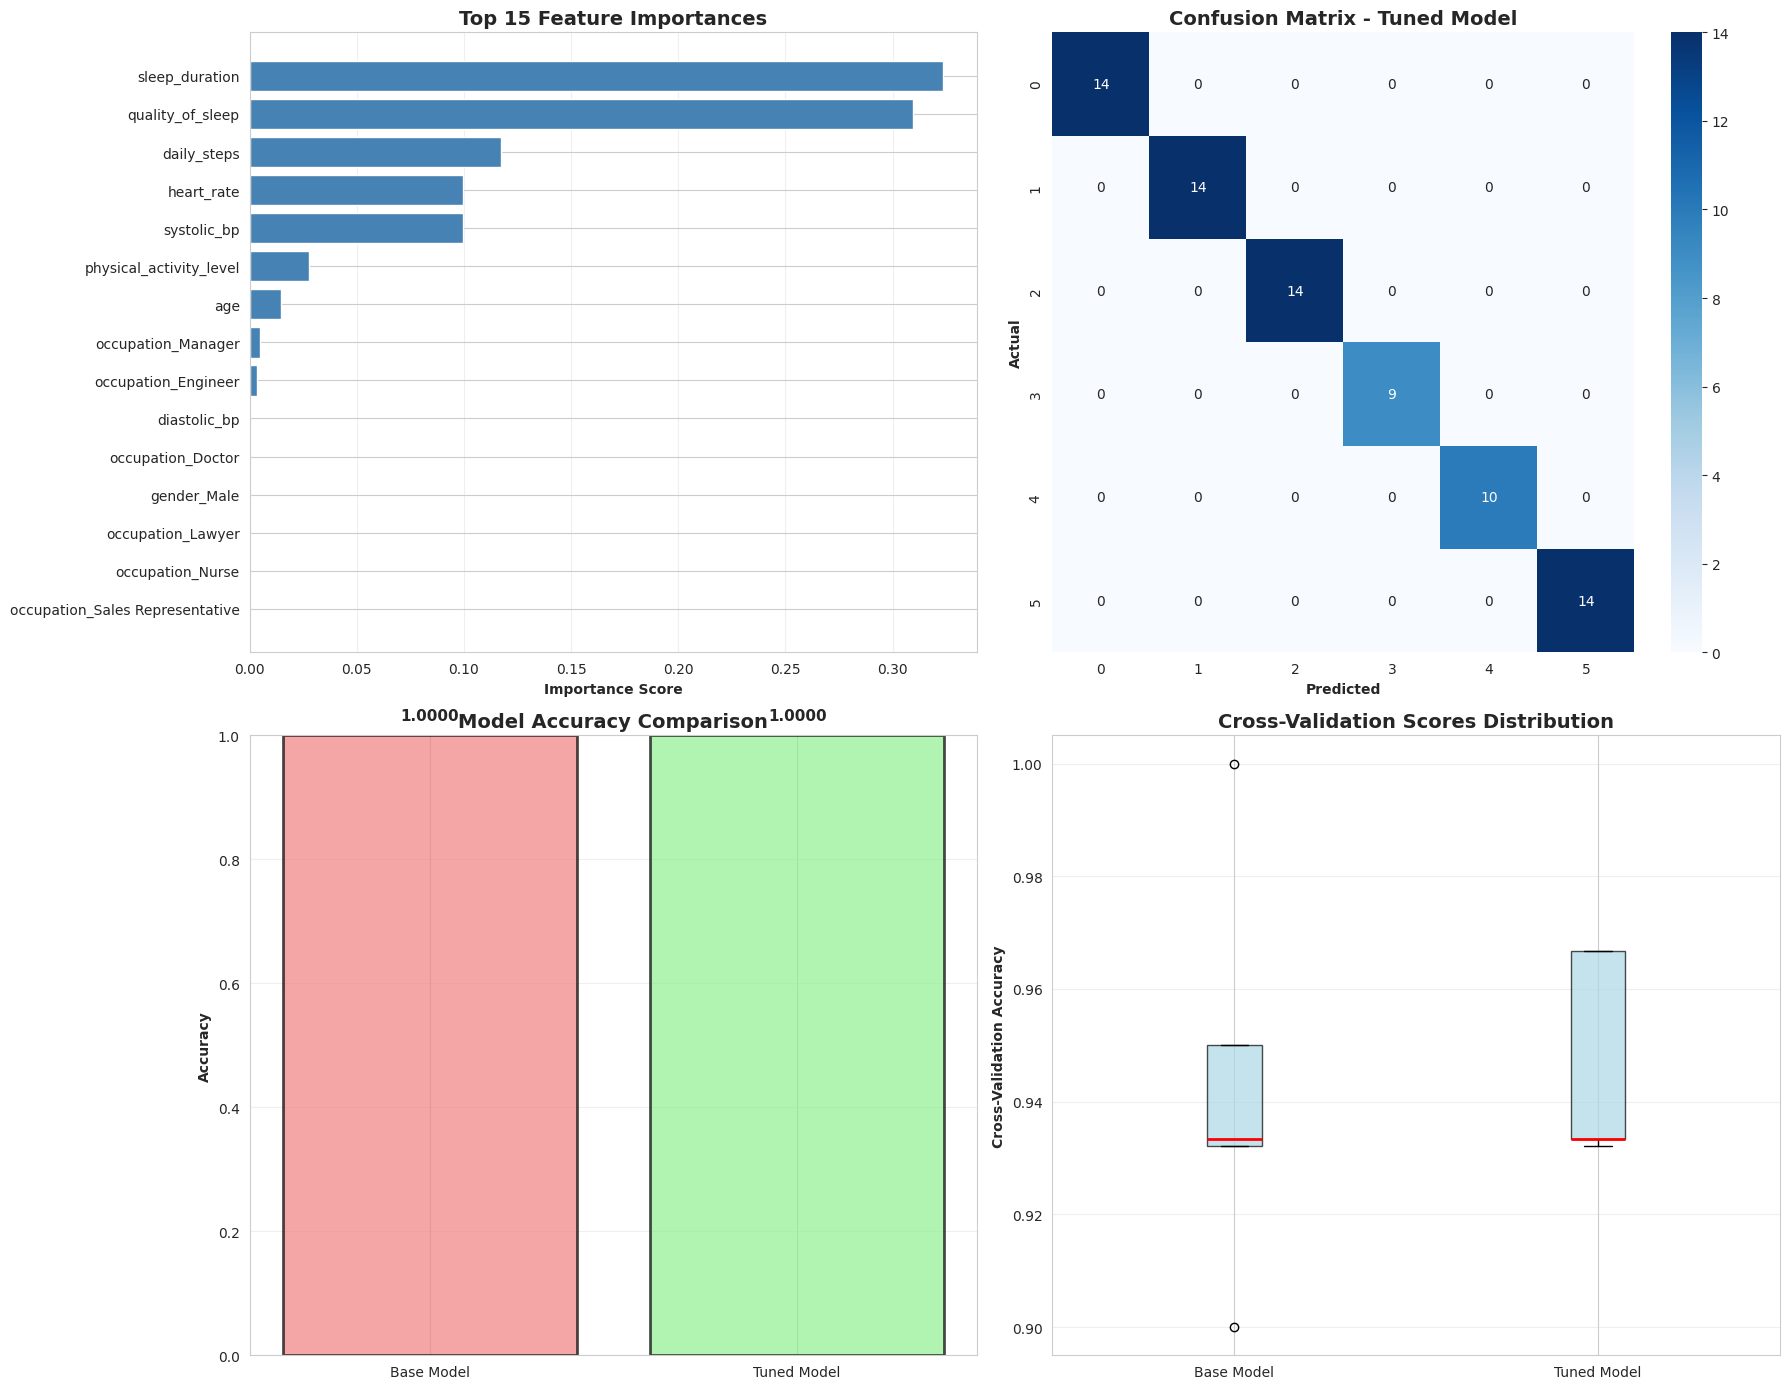

In [27]:
# Visualize feature importance and model performance
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# 1. Feature Importance Bar Plot
top_n = 15
top_features = feature_importance.head(top_n)
axes[0, 0].barh(range(len(top_features)), top_features['Importance'], color='steelblue')
axes[0, 0].set_yticks(range(len(top_features)))
axes[0, 0].set_yticklabels(top_features['Feature'])
axes[0, 0].invert_yaxis()
axes[0, 0].set_xlabel('Importance Score', fontweight='bold')
axes[0, 0].set_title(f'Top {top_n} Feature Importances', fontsize=14, fontweight='bold')
axes[0, 0].grid(axis='x', alpha=0.3)

# 2. Confusion Matrix - Tuned Model
cm = confusion_matrix(y_test, y_pred_tuned)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, 1], cbar=True)
axes[0, 1].set_xlabel('Predicted', fontweight='bold')
axes[0, 1].set_ylabel('Actual', fontweight='bold')
axes[0, 1].set_title('Confusion Matrix - Tuned Model', fontsize=14, fontweight='bold')

# 3. Model Comparison
models_names = ['Base Model', 'Tuned Model']
accuracies = [base_accuracy, tuned_accuracy]
colors = ['lightcoral', 'lightgreen']

bars = axes[1, 0].bar(models_names, accuracies, color=colors,
                      alpha=0.7, edgecolor='black', linewidth=2)
axes[1, 0].set_ylabel('Accuracy', fontweight='bold')
axes[1, 0].set_ylim([0, 1])
axes[1, 0].set_title('Model Accuracy Comparison', fontsize=14, fontweight='bold')
axes[1, 0].grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, (bar, acc) in enumerate(zip(bars, accuracies)):
    height = bar.get_height()
    axes[1, 0].text(bar.get_x() + bar.get_width()/2., height + 0.02,
                    f'{acc:.4f}', ha='center', va='bottom', fontweight='bold', fontsize=11)

# 4. Cross-Validation Score Comparison
cv_data = pd.DataFrame({
    'Model': ['Base']*5 + ['Tuned']*5,
    'CV Score': list(cv_scores_base) + list(cv_scores_tuned)
})

box_plot = axes[1, 1].boxplot([cv_scores_base, cv_scores_tuned],
                              labels=['Base Model', 'Tuned Model'],
                              patch_artist=True,
                              boxprops=dict(facecolor='lightblue', alpha=0.7),
                              medianprops=dict(color='red', linewidth=2))
axes[1, 1].set_ylabel('Cross-Validation Accuracy', fontweight='bold')
axes[1, 1].set_title('Cross-Validation Scores Distribution', fontsize=14, fontweight='bold')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('stress_classification_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

**13. Decision Tree Visualization**


DECISION TREE VISUALIZATION


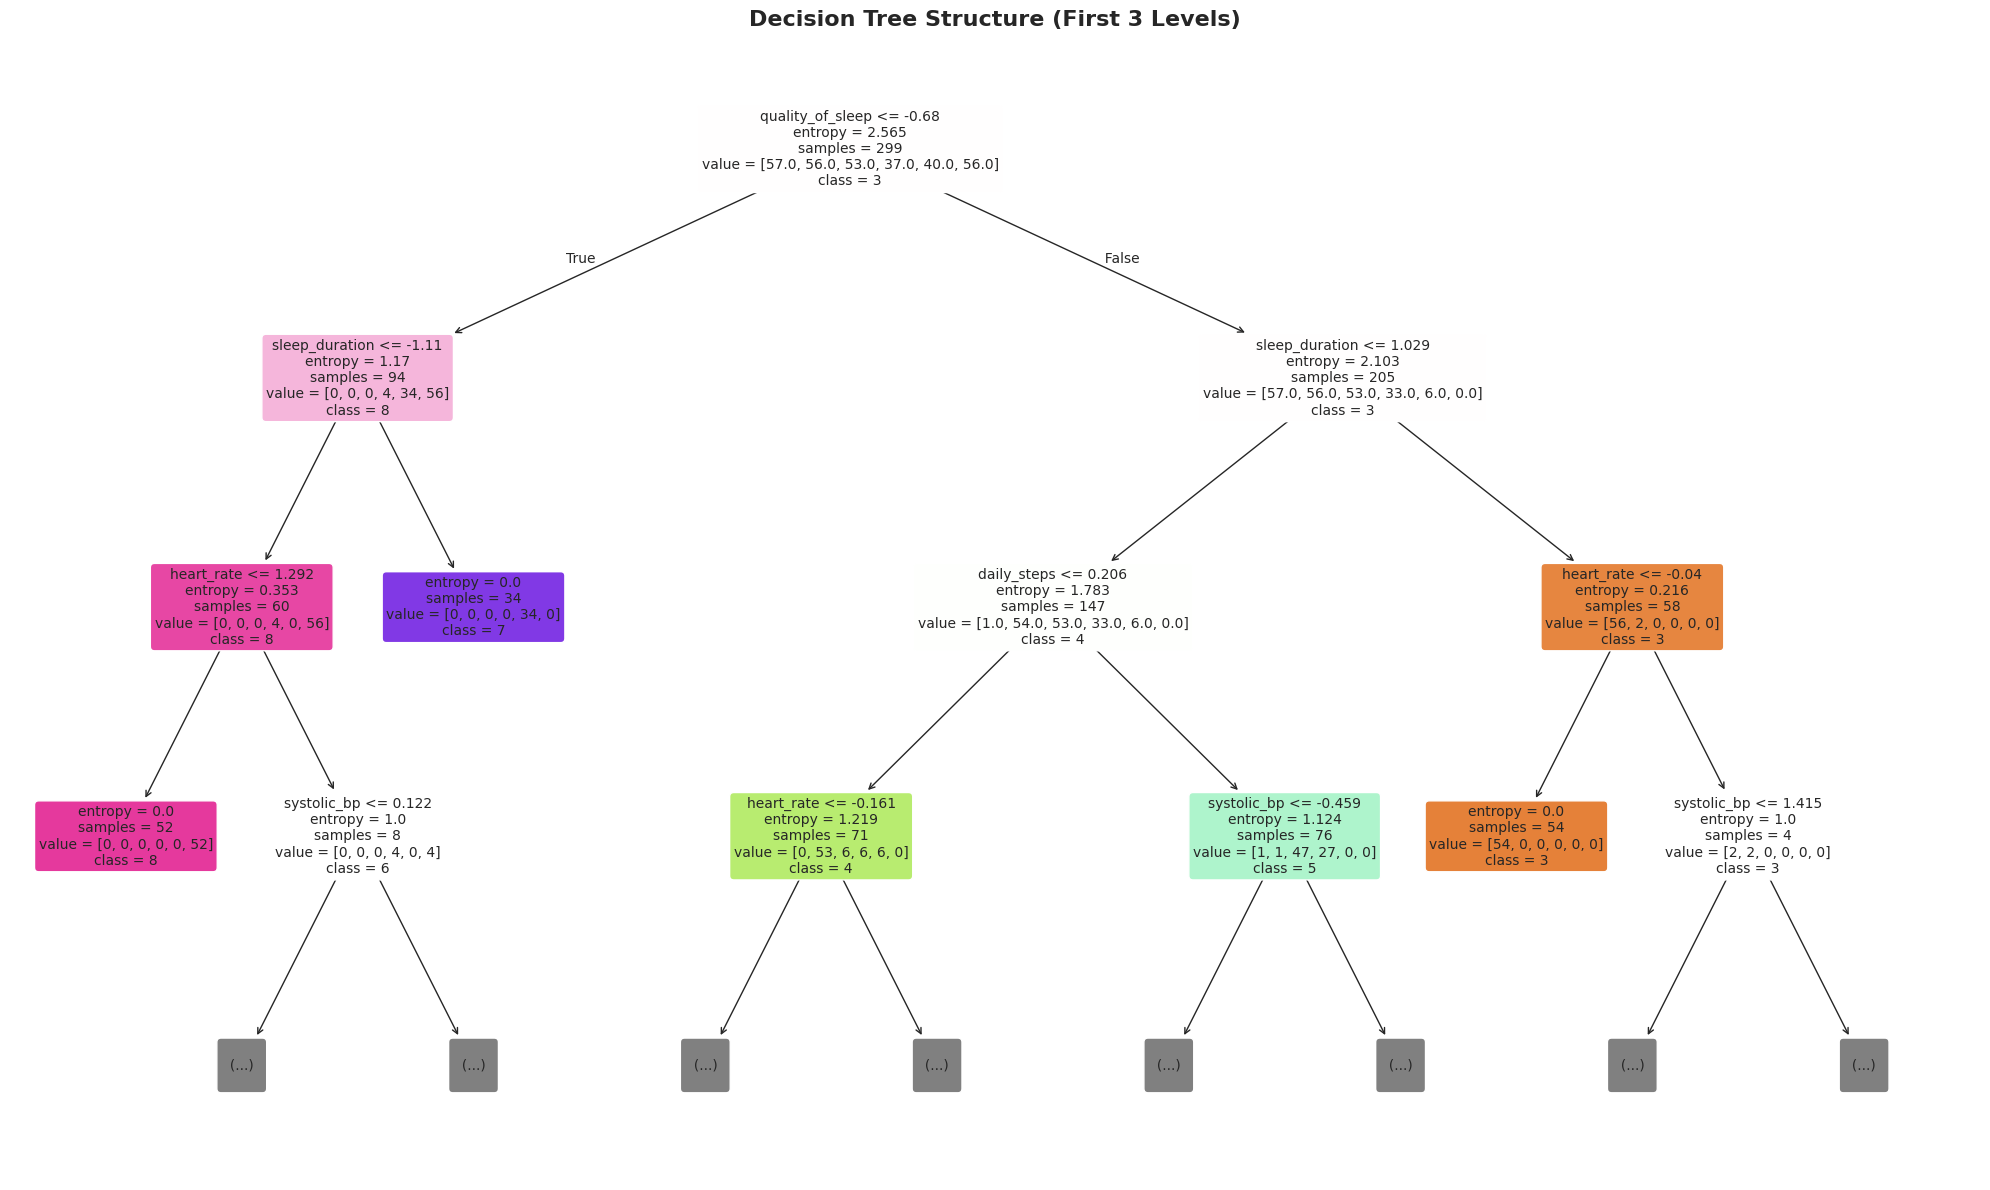

In [28]:
print("\n" + "="*70)
print("DECISION TREE VISUALIZATION")
print("="*70)

plt.figure(figsize=(20, 12))
plot_tree(best_model,
          feature_names=X.columns,
          class_names=[str(c) for c in best_model.classes_],
          filled=True,
          rounded=True,
          fontsize=10,
          max_depth=3)  # Show only first 3 levels for readability
plt.title('Decision Tree Structure (First 3 Levels)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('decision_tree_structure.png', dpi=300, bbox_inches='tight')
plt.show()

**14. Analysis Summary**

In [29]:
print("\n" + "="*70)
print("ANALYSIS SUMMARY")
print("="*70)
print(f"\n✓ Best Model Parameters: {grid_search.best_params_}")
print(f"✓ Base Model Test Accuracy: {base_accuracy:.4f}")
print(f"✓ Tuned Model Test Accuracy: {tuned_accuracy:.4f}")
print(f"✓ Performance Improvement: {improvement:+.2f}%")
print(f"✓ Most Important Feature: {feature_importance.iloc[0]['Feature']}")
print(f"✓ Top 3 Features: {', '.join(feature_importance.head(3)['Feature'].tolist())}")
print("\n" + "="*70)


ANALYSIS SUMMARY

✓ Best Model Parameters: {'criterion': 'entropy', 'max_depth': 7, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
✓ Base Model Test Accuracy: 1.0000
✓ Tuned Model Test Accuracy: 1.0000
✓ Performance Improvement: +0.00%
✓ Most Important Feature: sleep_duration
✓ Top 3 Features: sleep_duration, quality_of_sleep, daily_steps

